In [2]:
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv("phishing.csv", sep=";")
df.drop_duplicates(inplace=True)  # poista duplikaatit

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [17]:
#selittävät muuttujat
X = df.loc[:, 'having_IP_Address':'Statistical_report'] # riveiltä kaikki, sarakkeista having_IP_Address -> Statistical_report

#vastemuuttuja
Y = df.loc[:, 'Result'] # riveiltä kaikki, sarakkeista Result

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2 , random_state=42
)  # todelliset X ja Y

print(X_train.shape)
print(X_test.shape)

(4679, 30)
(1170, 30)


# Mallinnus

In [22]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
print(tree.export_text(classifier, feature_names=colnames[:len(colnames)-1]))

|--- SSLfinal_State <= 0.50
|   |--- Prefix_Suffix <= 0.00
|   |   |--- URL_of_Anchor <= -0.50
|   |   |   |--- class: -1
|   |   |--- URL_of_Anchor >  -0.50
|   |   |   |--- class: -1
|   |--- Prefix_Suffix >  0.00
|   |   |--- class: 1
|--- SSLfinal_State >  0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- class: -1
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|   |--- URL_of_Anchor >  -0.50
|   |   |--- SFH <= -0.50
|   |   |   |--- class: 1
|   |   |--- SFH >  -0.50
|   |   |   |--- class: 1



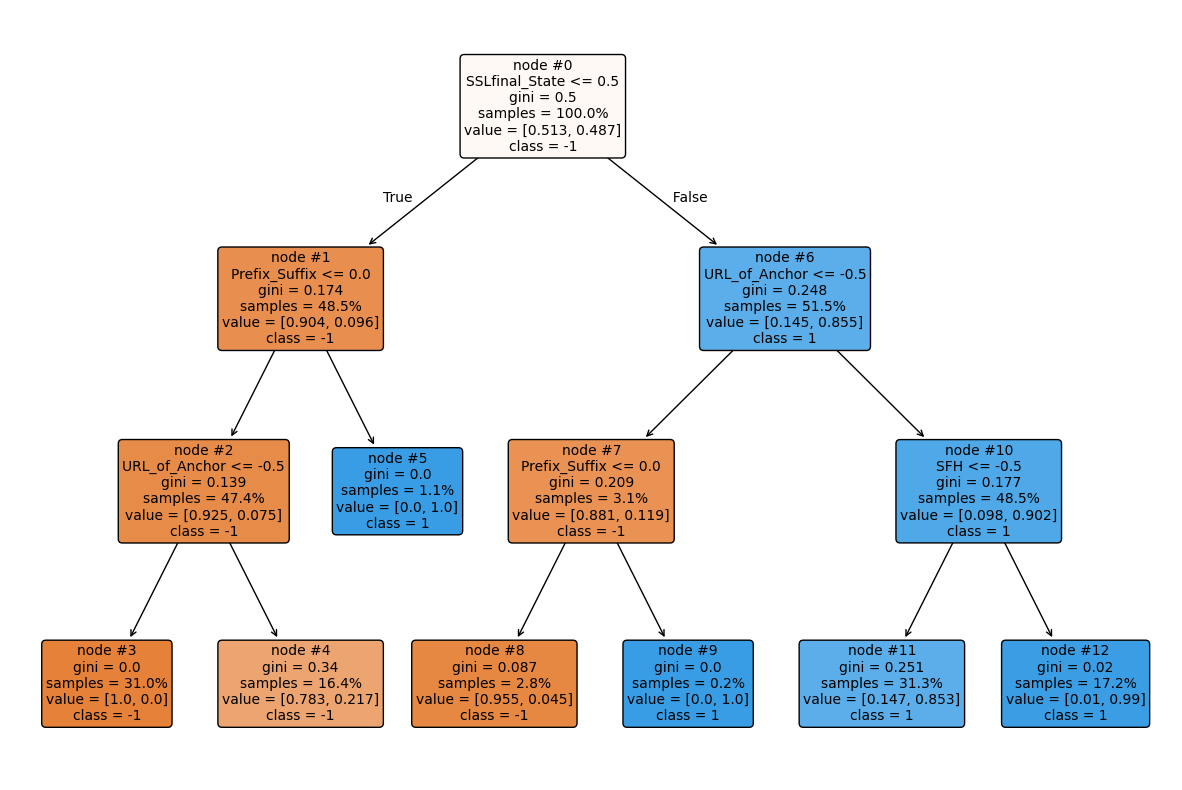

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Convert class names to strings
class_names = [str(cls) for cls in classifier.classes_]

tree.plot_tree(
    classifier,
    node_ids=True,
    class_names=class_names,
    filled=True,
    proportion=True,
    rounded=True,
    feature_names=colnames,
    fontsize=10,
)
plt.show()

### Selvitä kalastelusivujen yleisimmät piirteet (esimerkiksi kolme yleisintä) päätöspuumallin avulla.